In [5]:
import os
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split

# Get the root folder

root_folder = '../data/processed'  # Replace with the actual path to your root folder

folders = ['train', 'test', 'valid', 'config']
# Get a list of directories within the root folder
directories = [name for name in os.listdir(root_folder) if (os.path.isdir(os.path.join(root_folder, name)) & (name not in folders))]

# Count the number of directories
num_folders = len(directories)

print(f"Number of folders in {root_folder}: {num_folders}")

train_data, val_data = train_test_split(directories, test_size=0.15, random_state=42)
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

def move_files(source_folder: str, file_list: list, flag: str):

    for file in tqdm(file_list):
        # Create the folder and its parent directories if they don't exist
        final_path = os.path.join(source_folder, flag)
        os.makedirs(final_path, exist_ok=True)
        shutil.move(os.path.join(source_folder, file), final_path)


source_folder = '../data/processed'  # Replace with the actual path to the source folder

# Move the folder and its contents to the destination directory
move_files(source_folder, train_data, 'train')

# Move the folder and its contents to the destination directory
move_files(source_folder, val_data, 'val')

# Move the folder and its contents to the destination directory
move_files(source_folder, test_data, 'test')


Number of folders in ../data/processed: 389


100%|██████████| 67/67 [00:00<00:00, 32286.12it/s]


..\data\raw\NCAA\NCAA_1_tracking\playerTrackingFrames\2020.02.03-NorthCarolina_at_FloridaState\frame_005716.jpg


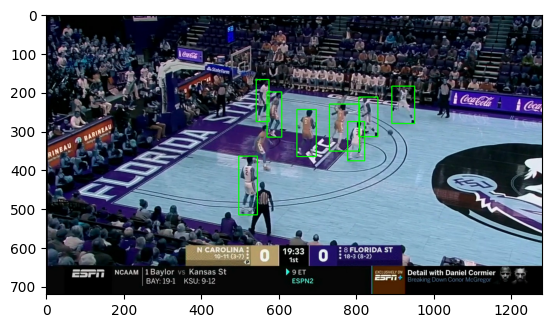

"\ncv2.imshow('img', img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

In [1]:
import json
import matplotlib.pyplot as plt
from PIL import Image
import cv2

PATH = '..\\data\\raw\\NCAA\\NCAA_1_tracking\\anno\\2020.02.03-NorthCarolina_at_FloridaState\\frame_005716.json'
# img_path = PATH.replace('anno', 'playerTrackingFrame').replace('json', 'jpg')
img_path = '..\\data\\raw\\NCAA\\NCAA_1_tracking\\playerTrackingFrames\\2020.02.03-NorthCarolina_at_FloridaState\\frame_005716.jpg'
img = cv2.imread(img_path)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img_path)
with (open(PATH, 'r')) as f:
    data = json.load(f)

for shape in  data['shapes']:
    if shape['label'].isdigit() :
         x, y = shape['points']
         x1, y1 = int(x[0]), int(x[1])
         x2, y2 = int(y[0]), int(y[1])
         cv2.rectangle(img, (x1, y1), (x2, y2),(0, 255, 0), 2)

plt.imshow(img)
plt.show()
'''
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

In [17]:
import os
from tqdm import tqdm
import shutil
from sklearn.model_selection import train_test_split

# Get the root folder

root_folder = '../data/processed'  # Replace with the actual path to your root folder

folders = ['train', 'test', 'valid', 'config']
# Get a list of directories within the root folder
directories = [name for name in os.listdir(root_folder) if (os.path.isdir(os.path.join(root_folder, name)) & (name not in folders))]

# Count the number of directories
num_folders = len(directories)

print(f"Number of folders in {root_folder}: {num_folders}")

Number of folders in ../data/processed: 768


In [18]:
root_folder = '../data/processed'
os.makedirs(os.path.join(root_folder, 'Market-1501'), exist_ok=True)
root_folder = os.path.join(root_folder, 'Market-1501')

def copy_files(file_list, root_folder, flag):
    for file in file_list:
        path = os.path.split(root_folder)[0]
        curent_folder = os.path.join(path, d)
        # Create the folder and its parent directories if they don't exist
        final_path = os.path.join(root_folder, flag)
        os.makedirs(final_path, exist_ok=True)
        shutil.move(os.path.join(curent_folder, file), final_path)

for d in tqdm(directories):
    path = os.path.split(root_folder)[0]
    curent_folder = os.path.join(path, d)
    list_pathes = os.listdir(curent_folder)
    train_data, eval_data = train_test_split(list_pathes, test_size=0.1, random_state=42)
    train_data, test_data = train_test_split(train_data, test_size=0.55, random_state=42)
    
    copy_files(train_data, root_folder, 'bounding_box_train')
    copy_files(eval_data, root_folder, 'query')
    copy_files(test_data, root_folder, 'bounding_box_test')

    os.removedirs(curent_folder)



100%|█████████▉| 766/768 [07:39<00:01,  1.67it/s]


ValueError: With n_samples=1, test_size=0.1 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.